### Naive Bayes A Movie Recommendation Project

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I. Load Data

In [ ]:
data_path = 'data/ratings.dat'
df = pd.read_csv(data_path, header=None, sep='::', engine='python')
df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
print(df)

         user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]


### II. Preparing the data

In [5]:
# now many users and movies?
n_users = df['user_id'].nunique()
n_movies = df['movie_id'].nunique()
print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")

Number of users: 6040
Number of movies: 3706


In [9]:
# construct a 6,040 (the number of users) by 3,706 (the number of movies) matrix where each row

def load_user_rating_data(df, n_users, n_movies):
    data = np.zeros([n_users, n_movies], dtype=np.intc)
    movie_id_mapping = {}
    for user_id, movie_id, rating in zip(df['user_id'], df['movie_id'], df['rating']):
        user_id = int(user_id) - 1
        if movie_id not in movie_id_mapping:
            movie_id_mapping[movie_id] = len(movie_id_mapping)
        data[user_id, movie_id_mapping[movie_id]] = rating
    return data, movie_id_mapping

data, movie_id_mapping = load_user_rating_data(df, n_users, n_movies)


In [13]:
values, counts = np.unique(data, return_counts=True)
for value, count in zip(values, counts):
    print(f'Number of rating {value}: {count}')

Number of rating 0: 21384031
Number of rating 1: 56174
Number of rating 2: 107557
Number of rating 3: 261197
Number of rating 4: 348971
Number of rating 5: 226310


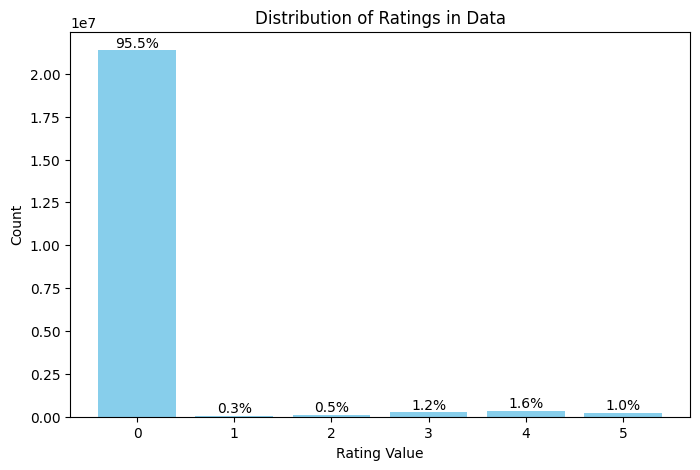

In [ ]:
values, counts = np.unique(data, return_counts=True)
percentages = 100 * counts / counts.sum()

plt.figure(figsize=(8, 5))
bars = plt.bar(values, counts.astype(float), color='skyblue')
plt.xlabel('Rating Value')
plt.ylabel('Count')
plt.title('Distribution of Ratings in Data')
plt.xticks(values)

# each bar with its percentage above the bar
for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f'{pct:.1f}%', 
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.show()

In [20]:
print(df['movie_id'].value_counts())

movie_id
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64


In [22]:
target_movie_id = 2858
X_raw = np.delete(data, movie_id_mapping[target_movie_id], axis=1)
Y_raw = data[:, movie_id_mapping[target_movie_id]]
X = X_raw[Y_raw > 0]
Y = Y_raw[Y_raw > 0]
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)


Shape of X: (3428, 3705)
Shape of Y: (3428,)


In [24]:
print(X_raw)

[[5 3 3 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]]


In [26]:
print(Y_raw)

[0 4 4 ... 0 0 4]


In [27]:
# consider movies with ratings greater than 3 as being liked (being recommended)
recommend = 3
Y[Y <= recommend] = 0
Y[Y > recommend] = 1
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')


2853 positive samples and 575 negative samples.


In [29]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 5 ... 0 0 0]
 [4 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(len(Y_train), len(Y_test))


2742 686


### III. Training a Naïve Bayes model


In [31]:
# use MultinomialNB instead of BernoulliNB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [32]:
prediction_prob = clf.predict_proba(X_test)
print(prediction_prob[0:10])

[[7.50487439e-23 1.00000000e+00]
 [1.01806208e-01 8.98193792e-01]
 [3.57740570e-10 1.00000000e+00]
 [1.00000000e+00 2.94095407e-16]
 [1.00000000e+00 2.49760836e-25]
 [7.62630220e-01 2.37369780e-01]
 [3.47479627e-05 9.99965252e-01]
 [2.66075292e-11 1.00000000e+00]
 [5.88493563e-10 9.99999999e-01]
 [9.71326867e-09 9.99999990e-01]]


In [39]:
prediction = clf.predict(X_test)
print(prediction[:10])

[1 1 1 0 0 0 1 1 1 1]


In [40]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')


The accuracy is: 71.6%


The classification accuracy is around 72%, which means that the Naïve Bayes classifier we’ve constructed accurately suggests movies to users about three quarters of the time. Ideally, we could also utilize movie genre information from the movies.dat file, and user demographics (gender, age, occupation, and ZIP code) information from the users.dat file. Obviously, movies in similar genres tend to attract similar users, and users of similar demographics likely have similar movie preferences.

### IV. Evaluating classification performance

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction, labels=[0, 1]))


[[ 60  47]
 [148 431]]
